In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
C:\Users\Java\PycharmProjects\DemoDB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Java\PycharmProjects\DemoDB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Java\PycharmProjects\DemoDB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Java\Pychar

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


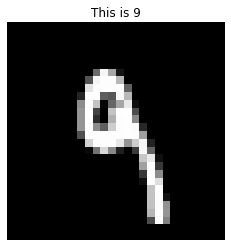

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,36,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [7]:
# 對圖片處理: 攤開(1D) -> 0~1(一開始隨機的weights才能配合上)
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255

In [8]:
# 對答案處理: One-Hot Encoding -> 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# batch_size: 看多少筆資料調整(梯度下降)一次
# 看資料決定: 資料小(100-200) 資料大(10-20)
# epochs: 整份資料(60000)看幾次[模型什麼時候該停止訓練]
# val_loss:平滑的時候你就該停下來了
# validation_split: 驗證模型多好要用沒看過的資料
# verbose: log多寡(1:最詳盡, 2:必要的而已 0:完全不印)
# 調整次數: 60000 * 0.9 * 10(epochs) / 200(batch)
mlp.fit(x=x_train_norm, y=y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.3707 - acc: 0.8987 - val_loss: 0.1623 - val_acc: 0.9577
Epoch 2/10
 - 1s - loss: 0.1651 - acc: 0.9527 - val_loss: 0.1139 - val_acc: 0.9683
Epoch 3/10
 - 1s - loss: 0.1152 - acc: 0.9669 - val_loss: 0.0951 - val_acc: 0.9727
Epoch 4/10
 - 1s - loss: 0.0873 - acc: 0.9751 - val_loss: 0.0876 - val_acc: 0.9753
Epoch 5/10
 - 1s - loss: 0.0697 - acc: 0.9799 - val_loss: 0.0768 - val_acc: 0.9768
Epoch 6/10
 - 1s - loss: 0.0555 - acc: 0.9842 - val_loss: 0.0761 - val_acc: 0.9778
Epoch 7/10
 - 1s - loss: 0.0457 - acc: 0.9877 - val_loss: 0.0701 - val_acc: 0.9805
Epoch 8/10
 - 1s - loss: 0.0367 - acc: 0.9903 - val_loss: 0.0681 - val_acc: 0.9803
Epoch 9/10
 - 1s - loss: 0.0304 - acc: 0.9921 - val_loss: 0.0649 - val_acc: 0.9820
Epoch 10/10
 - 1s - loss: 0.0254 - acc: 0.9937 - val_loss: 0.0656 - val_acc: 0.9818


In [10]:
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 14us/step


[0.06701656668179203, 0.9795]

In [11]:
from sklearn.metrics import confusion_matrix
base = list(range(10))
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = mlp.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),970,0,0,1,1,0,2,1,4,1
1(原本),0,1124,4,0,0,1,3,0,3,0
2(原本),3,1,1006,0,2,0,3,9,8,0
3(原本),0,0,5,982,0,5,0,5,7,6
4(原本),1,0,4,1,962,0,2,2,2,8
5(原本),2,0,0,5,1,868,5,2,5,4
6(原本),4,2,0,1,3,3,942,0,3,0
7(原本),1,4,7,1,0,0,0,1009,2,4
8(原本),1,0,3,3,2,2,1,4,955,3
9(原本),4,3,0,7,8,1,0,5,4,977


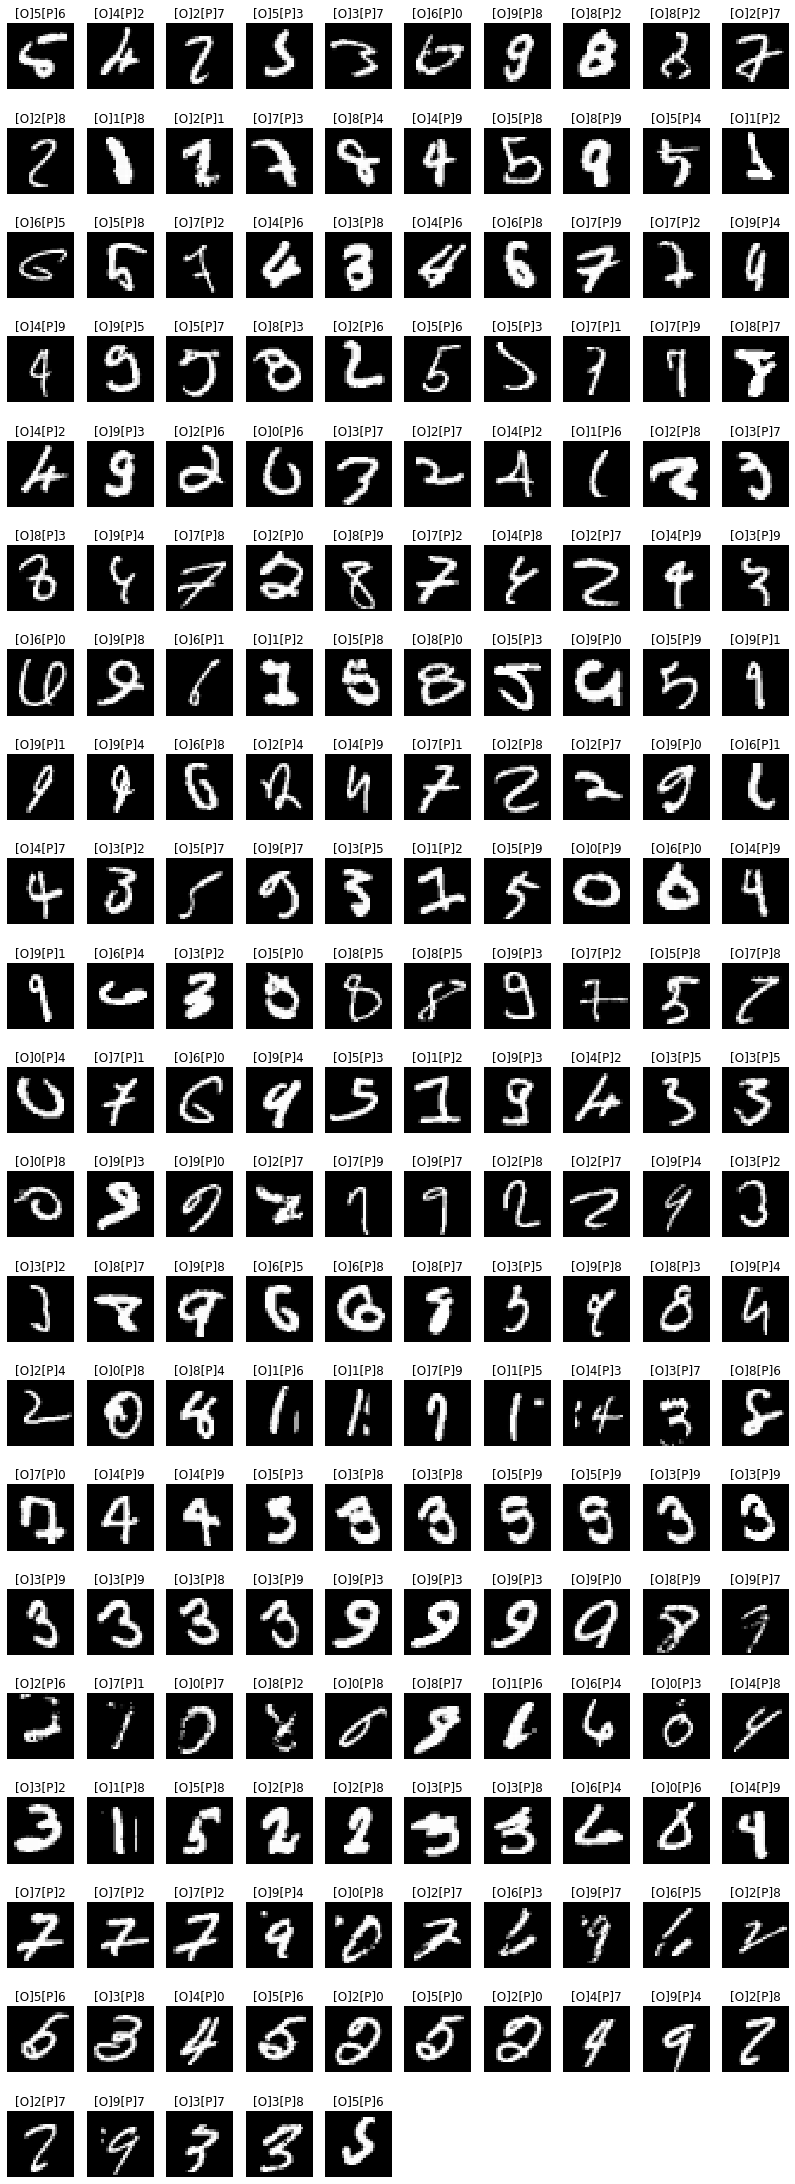

In [12]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]" + str(false_answer[i]) + "[P]" + str(false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")


In [19]:
from keras.preprocessing.image import load_img
fp = input("你要測試哪張圖片?")
img = load_img(fp, target_size=(28, 28))
grayimg = np.array(img.convert("L"))
grayimg = grayimg.reshape(784) / 255
grayimgnp = np.array([grayimg])
pre = mlp.predict_classes(grayimgnp)[0]
print("我覺得是:", pre)
img

你要測試哪張圖片?test2.png
我覺得是: 2
